# IMDB Linear Regression Total Score
![ImdbIcon](../images/imdbheader.jpg)

Notebook Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Importing so that I can use LinearRegression and OLS Models.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

In [2]:
totalscore_df = pd.read_csv('../data/totalscore_df.csv')

In [3]:
totalscore_df.shape

(12821, 52)

## Linear Regression

In [4]:
features = ['duration', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
            'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 
            'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'votes', 'votes_1', 'votes_2', 'votes_3', 'votes_4', 'votes_5', 
            'votes_6', 'votes_7', 'votes_8', 'votes_9', 'votes_10', 'us_voters_rating', 'us_voters_votes', 'plot_sentiment', 
            'director_score', 'actor_score', 'actress_score']

In [5]:
X = totalscore_df[features]
y = totalscore_df['total_score']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = lr.predict(X_train)

residuals = y_train - predictions

rss = (residuals ** 2).sum()

mse = metrics.mean_squared_error(y_train, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions))

In [9]:
print("RMSE:", rmse)
print("Training Score:", lr.score(X_train, y_train))
print("Testing Score:", lr.score(X_test, y_test))

RMSE: 0.38580360984569145
Training Score: 0.9144712308595946
Testing Score: 0.9083453819933587


In [10]:
null_predictions = np.zeros_like(y_test)

null_pred = null_predictions + y_test.mean()

baseline = metrics.mean_squared_error(y_test, null_pred, squared = False)

In [11]:
print("Baseline RMSE:", baseline)
print("RMSE:", rmse)

Baseline RMSE: 1.3266860099257332
RMSE: 0.38580360984569145


## Visualizations

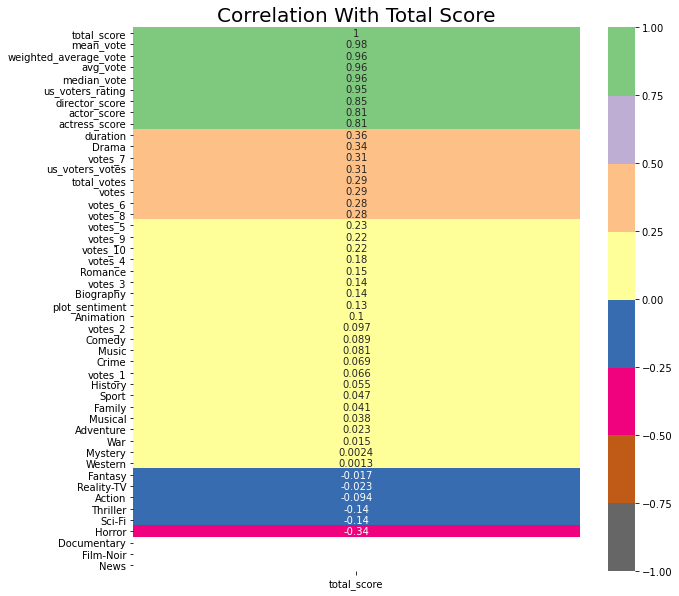

In [12]:
plt.figure(figsize = (10, 10))

movie_feature_corr = totalscore_df.corr()[['total_score']]

sns.heatmap(movie_feature_corr.sort_values(by = 'total_score', ascending = False),
           vmin = -1, vmax = 1,
           cmap = 'Accent_r',
           annot = True);

plt.title("Correlation With Total Score", size = 20);